# Instalando e Importando o Apache Beam

Vamos instalar e importar o Apache Beam


In [2]:
%pip install -q apache-beam[gcp,interactive]==2.28.0 --no-warn-conflicts

     |████████████████████████████████| 9.0MB 7.1MB/s 
     |████████████████████████████████| 2.3MB 49.4MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 153kB 63.2MB/s 
     |████████████████████████████████| 829kB 45.3MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 17.7MB 245kB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 92kB 12.3MB/s 
     |████████████████████████████████| 174kB 51.4MB/s 
     |████████████████████████████████| 184kB 53.3MB/s 
     |████████████████████████████████| 276kB 51.5MB/s 
     |████████████████████████████████| 440kB 49.3MB/s 
     |████████████████████████████████| 174kB 53.8MB/s 
     |████████████████████████████████| 153kB 50.5MB/s 
     |████████████████████████████████| 256kB 52.2MB/s 
     |████████████████████████████████| 788kB 45.5MB/s 
     |████████████████████████████████| 122kB 50.2MB/s 

In [1]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions

---
**Observação**: 

As vezes acontece erro na importação acima.

Para arrumar é necessário reiniciar o ambiente e executar a célula novamente.

---

# Importando o Runner

Neste caso o InteractiveRunner para que possamos analisar melhor os dados e transformações

In [2]:
from apache_beam.runners.interactive.interactive_runner import InteractiveRunner
import apache_beam.runners.interactive.interactive_beam as ib

# Criando a primeira pipeline

Para criar uma pipeline, é necessário instânciar o objeto `Pipeline`

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())

Cada etapa dentro da pipeline é separada pelo operador pipe (`|`)

A saída de cada transformação é passada para a próxima como entrada

E no final é retornada uma `PCollection` que podemos armazenar

```py
# Os elementos são enviados do passo1 até o passo3 e depois retornado para a variável `outputs`.
outputs = pipeline | passo1 | passo2 | passo3
```

As pipelines podem ser grandes e algumas vezes pode ser mais facil visualizar se adicionarmos um parenteses e quebrarmos os passos em linhas diferentes.

```py
# Semelhante ao exemplo anterior.
outputs = (
  pipeline
  | step1
  | step2
  | step3
)
```

O Apache Beam espera que cada passo (transformação) tenha uma identificação ou descrição única.

Para adicionar uma descrição a determinado passo dentro da pipeline, basta utilizar o operador `>>`, como no exemplo abaixo:
```py
# Utilizado como identificaçao e para debug
outputs = (
  pipeline
  | 'Primeiro passo' >> passo1
  | 'Segundo passo' >> passo2
  | 'Terceiro passo' >> passo3
)
```

# Criando elementos (PCollection)

## Create

Podemos criar elementos diretamente no código com a função `beam.Create` 

ou normalmente utilizamos algum driver/conector de entrada para ler de os dados de um arquivo, de um banco de dados, de uma fila, etc

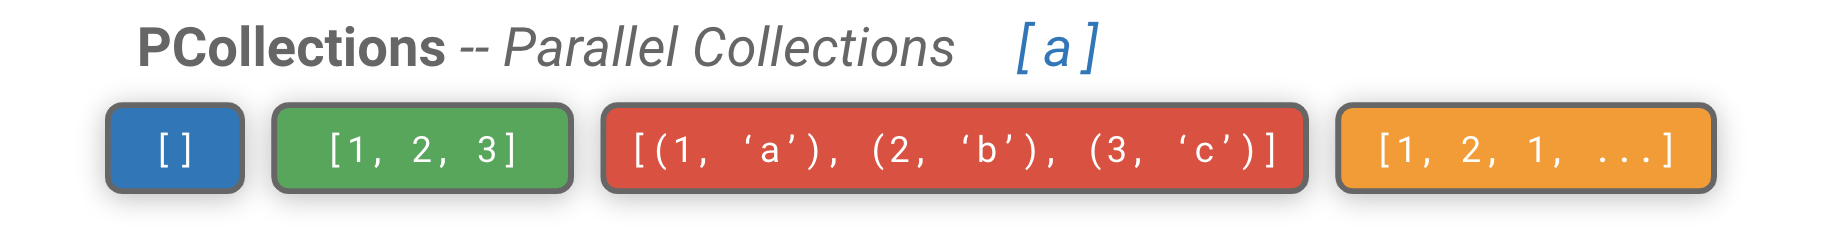

In [ ]:
pcollection_numeros = pipeline | beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
pcollection_numeros = pipeline | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
pcollection_texto = pipeline | beam.Create(['Hello',
                                 'World',
                                 'from',
                                 'Apache',
                                 'Beam'])

In [ ]:
pcollection_texto = pipeline | "Dados em texto" >> beam.Create(['Hello',
                                 'World',
                                 'from',
                                 'Apache',
                                 'Beam'])

In [ ]:
pcollection_texto2 = pipeline | "Dados em texto um elemento" >> beam.Create(['Hello World from Apache Beam'])

In [ ]:
ib.show(pcollection_numeros)

In [ ]:
ib.show(pcollection_texto)

# Transformações nos dados

## Elementos

- Cada elemento é processado independetemente
- Implementação sem salvar estado (stateless)

Temos o Map, FlatMap, Filter, ParDo

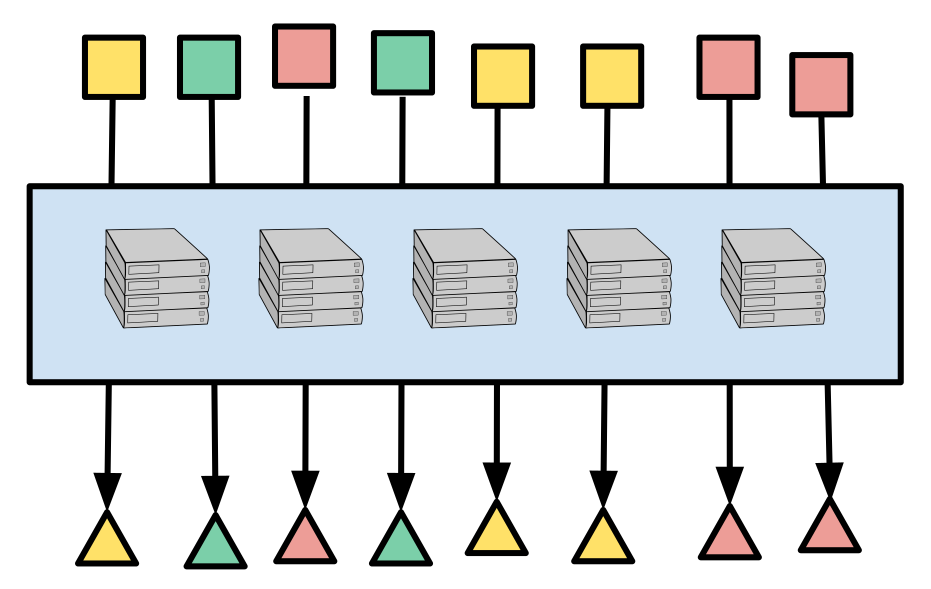

### Map: um-para-um

O `beam.Map` é uma função que transforma uma única entrada em uma única saída


> ℹ️ Exemplo: vamos pegar cada elemento do PCollection de entrada e multiplicar por 10.

In [ ]:
# cria o pipeline
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())

# cria os dados (PCollection)
pcollection_numeros = pipeline | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
resultado = pcollection_numeros | "Multiplicar por 10" >> beam.Map(lambda x: x*10)

In [ ]:
# mostrar o resultado (PCollection)
ib.show(resultado)

In [ ]:
# Visualizar a DAG da pipeline
ib.show_graph(pipeline)

Mesma pipeline construido todo de uma vez

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())
resultado = (
    pipeline
    | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
    | "Multiplicar por 10" >> beam.Map(lambda x: x*10)
)

In [ ]:
# mostrar o resultado (PCollection)
ib.show(resultado)

### FlatMap: um-para-muitos

O `beam.FlatMap` já nos permite mapear cada elemento do PCollection de entrada para uma coleção ou vários elementos de saída

Ele retorna uma `lista` de PCollection de saída e depois junta todos os dados em uma única PCollection de saída.


> ℹ️ Exemplo: vamos pegar cada elemento do PCollection de entrada e multiplicar por 10, 100 e 1000

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())
resultado = (
    pipeline
    | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
    | "Multiplicar por 10, 100, 100" >> beam.FlatMap(lambda x: [x*10, x*100, x*1000])
)

In [ ]:
ib.show(resultado)

### Filter: um-para-zero

Algumas vezes precisamos processar somente alguns elementos dentro da PCollection e ignorar os outros.

Ou seja, nós gostariamos de filtrar os elementos dentro da PCollection de entrada.

O `beam.Filter` é uma função que analisa um único elemento e retorna verdadeiro(True) caso queira que o elemento continue no PCollection de saída ou falso (False) para ignora-lo.

> ℹ️ Exemplo: vamos pegar cada elemento do PCollection de entrada e continuar somente com os elementos que são par.

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())
resultado = (
    pipeline
    | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
    | "Filtrar somente os pares" >> beam.Filter(lambda x: x%2 == 0)
)

In [ ]:
ib.show(resultado)

### ParDo

Iremos aplicar o método `ParDo`, o mais comum e poderoso do Beam para criar a pipeline do exemplo anterior

Vamos ver como implementar as duas transformações em uma só usando o `beam.ParDo`



> ℹ️ Exemplo: vamos pegar cada elemento do PCollection de entrada e continuar somente com os elementos que são par e depois multiplicar os elementos resultantes por 10.

In [ ]:
class FiltrarMultiplicar(beam.DoFn):
  def process(self, element):
    if element%2 == 0:
      yield element*10

In [ ]:
with beam.Pipeline(InteractiveRunner(), options=PipelineOptions()) as pipeline:
  resultado = (
      pipeline
      | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
      | "Filtrar somente os pares" >> beam.ParDo(FiltrarMultiplicar())
  )

In [ ]:
ib.show(resultado)

### Partition

Separa os elementos em grupos determinados por um critério especificado.

> ℹ️ Exemplo: vamos separar os valores em pares e impares usando o `Partition`

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner())

par, impar = (pipeline 
            | "Create Numbers" >> beam.Create(range(10))
            | "Par e Impar" >> beam.Partition(lambda n, partitions: n % 2, 2))

In [ ]:
ib.show(par)
ib.show(impar)

### ParDo (Partition)

Com o `ParDo` podemos também retornar mais de uma saída.

> ℹ️ Exemplo: vamos pegar cada elemento do PCollection de entrada e separar os pares dos impares e multiplicar o valor por 10

In [ ]:
class FiltrarMultiplicarMultiplos(beam.DoFn):
    def process(self, element):
        if element%2 == 0:
            yield beam.pvalue.TaggedOutput("par", element)
        else:
            yield beam.pvalue.TaggedOutput("impar", element)

        #yield element

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())
resultado = (
    pipeline
    | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
    | "Filtrar pares e impares" >> beam.ParDo(FiltrarMultiplicarMultiplos()).with_outputs("par", "impar")
)

In [ ]:
# pegar os elemetos do resultado
pares = resultado.par
impares = resultado.impar
todos = resultado[None] 

In [ ]:
ib.show(pares, impares, todos)

In [ ]:
ib.show_graph(pipeline)

## Outros

### Flatten: Combina muitos-para-um

Dados multiplas PCollection de entrada, o `beam.Flatten` junta os PCollection do mesmo tipo em um PCollection de saída único.

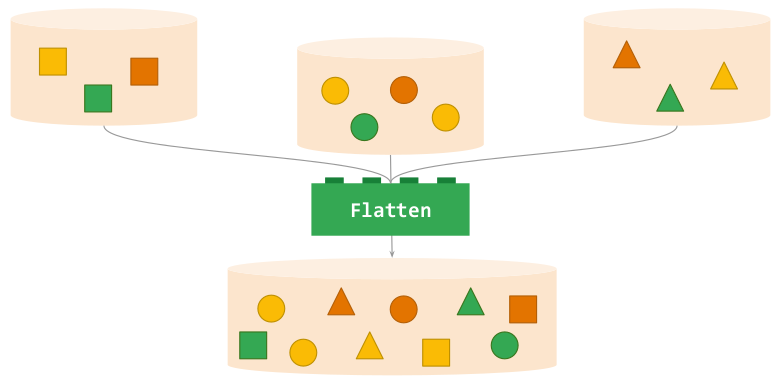

> ℹ️ Exemplo: vamos pegar os PCollections par e impar resultante do exemplo anterior e combinar eles para o resultado original (todos = todos_flatten)

In [ ]:
todos_flatten = (pares, impares) | beam.Flatten()

In [ ]:
ib.show(todos_flatten)

In [ ]:
ib.show_graph(pipeline)

## Agregação

- Os itens podem ou não ser agrupados por uma chave(key) e depois combinados

Temos o GroupByKey, CoGroupByKey, CombineGlobally, CombinePerKey, Count, Top, Max, Sum, etc

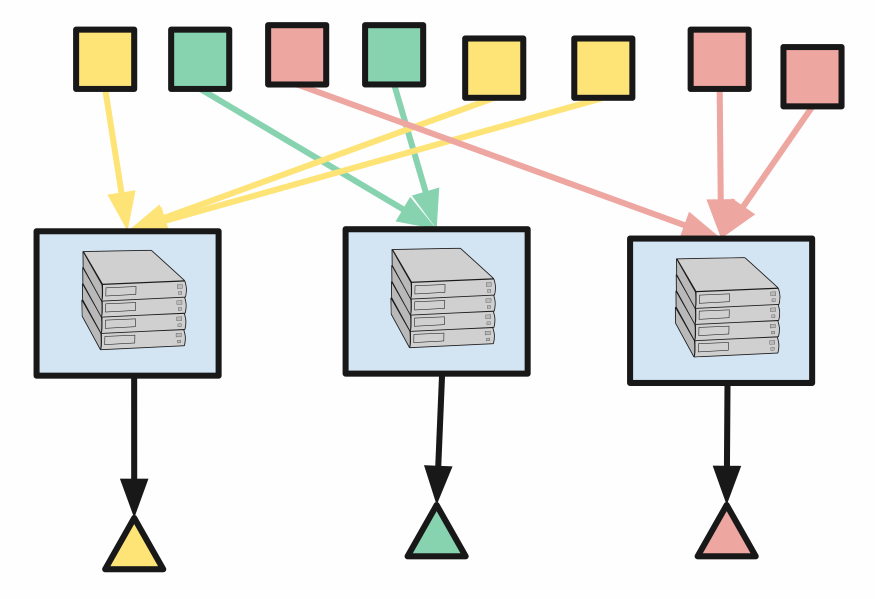

### GroupByKey: Agrupa dados por uma chave semelhante aos elementos

Útil para agrupar dados de um mesmo PCollection de entrada do tipo, pelo valor de suas chaves.

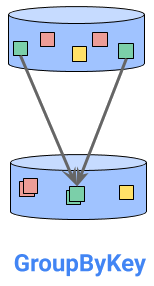

> ℹ️ Exemplo: vamos pegar algumas pessoas e os esportes que elas gostam e agrupar esporte.

In [ ]:
hobbies = [
    ('⚽', 'Rafael'),
    ('⚽', 'Fernando'),
    ('🎾', 'Fernando'),
    ('🥊', 'João'),
    ('🏀', 'Rafael'),
    ('🏐', 'Rafael'),
    ('⚽', 'João'),
    ('🎾', 'Luiz'),
    ('🥊', 'Luiz'),
]

In [ ]:
hobbies = [
    ('Rafael', '⚽'),
    ('Fernando', '⚽'),
    ('Fernando', '🎾'),
    ('João', '🥊'),
    ('Rafael', '🏀'),
    ('Rafael', '🏐'),
    ('João','⚽'),
    ('Luiz', '🎾'),
    ('Luiz', '🥊'),
]

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner())

In [ ]:
resultado = (
    pipeline
    | "Cria os pares (nome, esporte)" >> beam.Create(dados)
    | "Agrupa esportes por pessoa" >> beam.GroupByKey()
)

In [ ]:
ib.show(resultado)

### CoGroupByKey: Combina os dados por uma chave (JOIN)

Útil para agrupar dados de diferentes PCollection de entrada com uma chave em comum, similar ao JOIN do SQL.

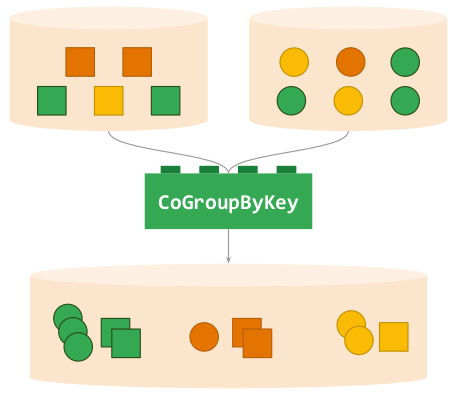

> ℹ️ Exemplo: vamos pegar duas entradas uma contendo os esportes que as pessoas tem como hobby e outro com o trabalho que essa pessoa tem e como saída teremos uma combinação destes.

In [ ]:
hobbies = [
    ('Rafael', '⚽'),
    ('Fernando', '⚽'),
    ('Fernando', '🎾'),
    ('João', '🥊'),
    ('Rafael', '🏀'),
    ('Rafael', '🏐'),
    ('João','⚽'),
    ('Luiz', '🎾'),
    ('Luiz', '🥊'),
]

trabalhos = [
    ('Rafael', 'Engenheiro de dados'),
    ('Fernando', 'Cientista de dados'),
    ('João', 'Full Stack'),
    ('Luiz', 'CEO'),
]

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner())

In [ ]:
hobbies_create = pipeline | "Create Hobbies" >> beam.Create(hobbies)
trabalhos_create = pipeline | "Create Trabalhos" >> beam.Create(trabalhos)

In [ ]:
#cogbk = (trabalhos_create, hobbies_create) | beam.CoGroupByKey()

In [ ]:
cogbk = {"trabalhos": trabalhos_create, "hobbies": hobbies_create} | beam.CoGroupByKey()

In [ ]:
ib.show_graph(pipeline)
ib.show(cogbk)

### Combine: muitos-para-um

Para muitos casos gostariamos de juntar todos os valores dentro de uma PCollection e retornar somente um valor final, seja uma soma, média ou alguma outra agregação.

Nestas situações, temos dois operadores: 
- um para agregar os dados de forma geral ou globalmente(`beam.CombineGlobally`)
- um para agregar baseado nas chaves (`beam.CombinePerKey`)

Estas transformações aceitam `funções` como paramêtros de entrada, desde que estam sejam do tipo `iterable`


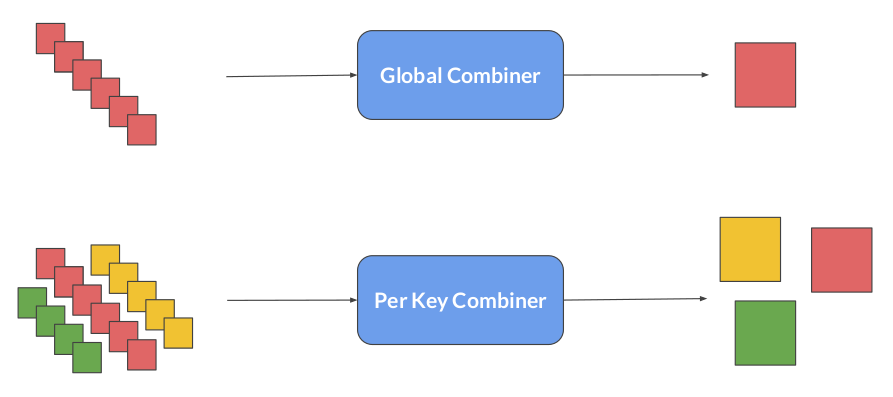

#### CombineGlobally

Combina todos os valores dentro do PCollection de forma global e retorna somente 1 valor.

> ℹ️ Exemplo: somar os valores do PCollection de entrada

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner())

In [ ]:
soma = (
    pipeline 
    | beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
    | beam.CombineGlobally(sum)
)

In [ ]:
ib.show(soma)

#### CombinePerKey

Combina os valores do PCollection de entrada aplicando uma função sobre os dados por chave.

> ℹ️ Exemplo: somar os valores do PCollection de entrada para cada tipo de legumes.

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner())

In [ ]:
legumes = [
  ('🌽', 1),
  ('🥕', 3),
  ('🥕', 2),
  ('🍆', 1),
  ('🍅', 4),
  ('🍅', 5),
  ('🍅', 3),
  ('🌽', 10),
]

In [ ]:
soma = (
    pipeline
    | "Cria pares de (legumes, quantidade)" >> beam.Create(legumes)
    | "Soma por cada tipo de legume" >> beam.CombinePerKey(sum)
)

In [ ]:
ib.show(soma)

### Count/Mean/Top/Max/Etc

Existem outros tipos de agregadores que são utilizados comumente quando se trata de análise de dados, aqui vamos descrever alguns brevemente

Todos eles podem ser aplicados globalmente ou por chaves.

- Count: retorna a quantidade de elementos dentro da PCollection
- Mean: retorna a média dos elementos dentro do PCollection
- Top: retorna os `n` maiores/menores elementos do PCollection dado uma expressão.
- Max: retorna o maior valor do PCollection

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner())

In [ ]:
legumes = [
  ('🌽', 1),
  ('🥕', 3),
  ('🥕', 2),
  ('🍆', 1),
  ('🍅', 4),
  ('🍅', 5),
  ('🍅', 3),
  ('🌽', 10),
]

In [ ]:
conta = (
    pipeline
    | beam.Create(legumes)
    | beam.combiners.Count.Globally()
)

In [ ]:
ib.show(conta)

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner())

In [ ]:
conta = (
    pipeline
    | beam.Create(legumes)
    | beam.combiners.Count.PerKey()
)

In [ ]:
ib.show(conta)

# Combinando transformações

Como vimos nos exemplos acima, podemos manipular os elementos dentro da PCollection para gerar outros dados.

Mas também podemos adicionar uma transformação em sequência da outra para realizar transformações aninhadas (nested)

> ℹ️ Exemplo: vamos pegar cada elemento do PCollection de entrada e continuar somente com os elementos que são par e depois multiplicar os elementos resultantes por 10 e ver a soma final.

In [ ]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())

In [ ]:
resultado = (
    pipeline
    | "Dados Númericos" >> beam.Create([1, 2, 3, 4, 5, 6, 7, 8, 9])
    | "Filtrar somente os pares" >> beam.Filter(lambda x: x%2 == 0)
    | "Multiplicar por 10" >> beam.Map(lambda x: x*10)
    | "Somar o resultado final" >> beam.CombineGlobally(sum)
)

In [ ]:
ib.show(resultado)

In [ ]:
ib.show_graph(pipeline)

# Exemplo completo

Vamos ler o texto de um arquivo

Separar as palavras de cada linha

Normalizar as palavras

Contar quantidade de cada palavra

Escrever em um arquivo de saída

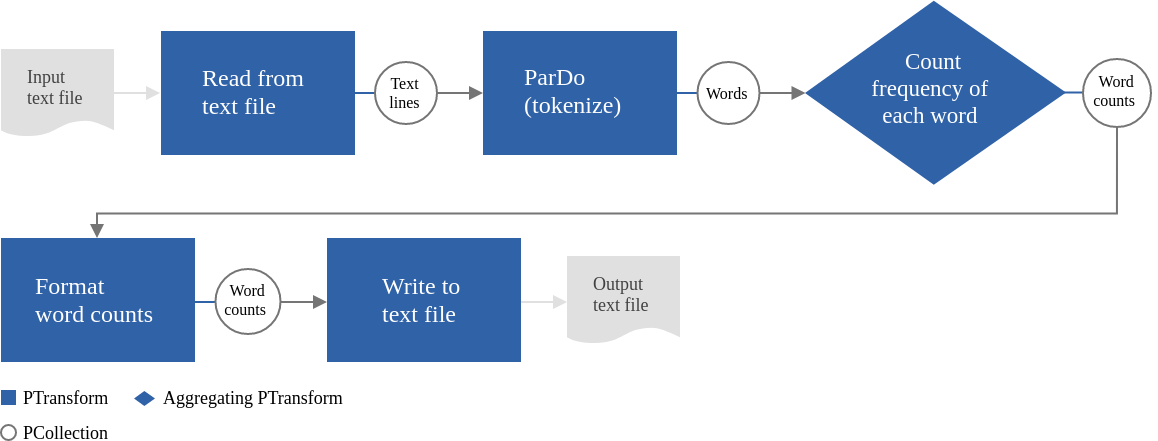

In [3]:
import google.auth
import re

In [5]:
from apache_beam import FlatMap, CombineGlobally
from apache_beam.transforms.combiners import Count, TopCombineFn
from apache_beam.io.textio import ReadFromText, WriteToText

In [6]:
# arquivo no Google CLoud Storage
path = "gs://dataflow-samples/shakespeare/kinglear.txt"

In [7]:
# separar as palavras da frase e remover caracteres especiais
def split_words(text):
    words = re.findall(r'[\w\']+', text.strip(), re.UNICODE)
    return [(x, 1) for x in words]

In [8]:
pipeline = beam.Pipeline(InteractiveRunner(), options=PipelineOptions())

In [9]:
source = pipeline | "Lê arquivo" >> ReadFromText(path)

count = (source | "Separa as palavras" >> FlatMap(split_words)
                | "Conta qtde cada palavra" >> Count.PerKey())

top_10 = count | "Pega as top 10 palavras" >> CombineGlobally(TopCombineFn(10, compare=lambda x, y: x[1] < y[1]))

write_result = top_10 | "Escreve arquivo com resultado" >> WriteToText('word_count.csv')

Connecting anonymously.


In [10]:
ib.show(write_result)

In [11]:
ib.show_graph(pipeline)